In [784]:
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")

In [785]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


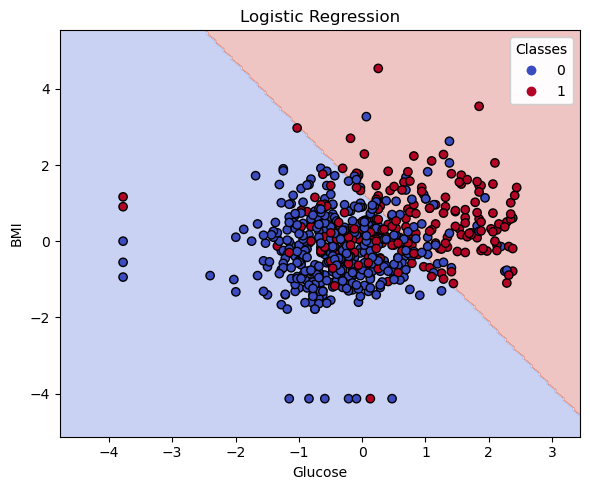

Beste Parameter für LogisticRegression: {'C': 0.1}
Beste Cross-Validation Score für LogisticRegression: 0.7606024256963881


In [786]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler

# Definiere Features und Zielvariable
X = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

# Teile den Datensatz in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistische Regression Modell definieren
model = LogisticRegression(C=1.0, max_iter=100000)

# Modell fitten und Entscheidungsgrenzen plotten
fig, ax = plt.subplots(figsize=(6, 5))
model.fit(X_train_scaled, y_train)  # Trainiere das Modell
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 200),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Mache Vorhersagen
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Entscheidungsgrenzen plotten
scatter = ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("Logistic Regression")
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")

plt.tight_layout()
plt.show()

# GridSearchCV für Logistische Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)

print(f"Beste Parameter für LogisticRegression: {grid_lr.best_params_}")
print(f"Beste Cross-Validation Score für LogisticRegression: {grid_lr.best_score_}")

# Logistic Regression with 2 features (BMI, Glucose)

Train Accurancy: 0.7569444444444444
Test Accurancy: 0.7760416666666666 

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



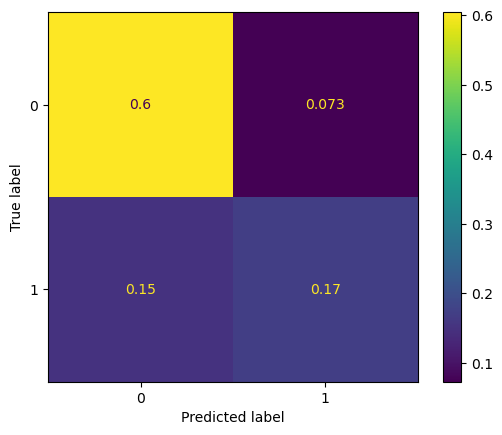

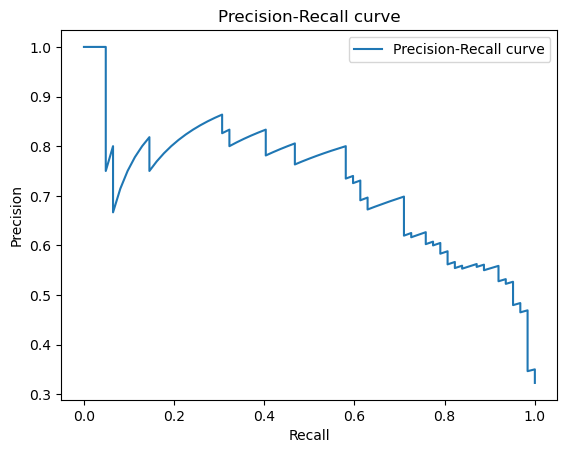

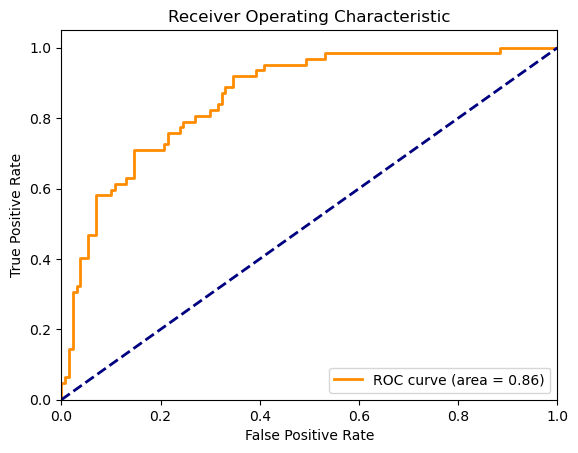

In [788]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

X = diabetes_df[["BMI", "Glucose"]]
y = diabetes_df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

l_regression_2 = LogisticRegression(max_iter=1000)
l_regression_2.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz (0 kein Diabetes; 1 Diabetes)
y_pred = l_regression_2.predict(X_test)

# Accurancy of the Train and Test Dataset
print("Train Accurancy: " + str(l_regression_2.score(X_train, y_train)))
print("Test Accurancy: " + str(l_regression_2.score(X_test, y_test)) + " \n")

# Auswertung des Modells
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize = 'all', labels = l_regression_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l_regression_2.classes_)
disp.plot()
plt.show()

# Precision-Recall Kurve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# ROC Kurve und AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression with 3 features (BMI, Glucose, Age)

Train Accuracy: 0.7673611111111112
Test Accuracy: 0.7760416666666666 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



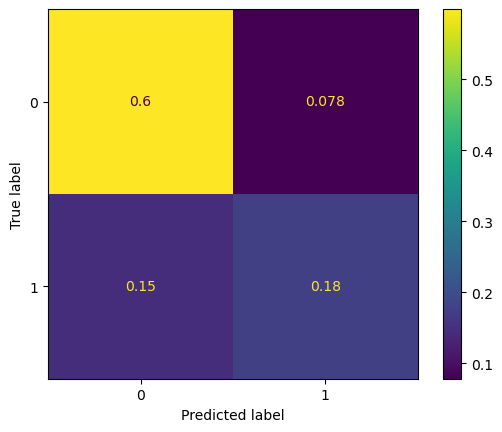

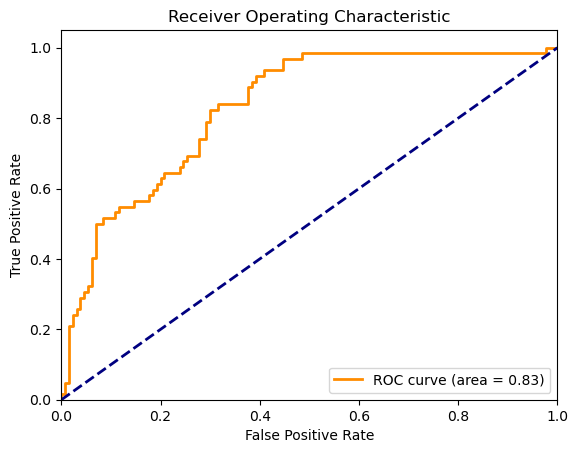

In [790]:
# Auswahl der Features und Zielvariable
X = diabetes_df[["BMI", "Glucose", "Age"]]
y = diabetes_df["Outcome"]

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Initialisieren und Trainieren des logistischen Regressionsmodells
l_regression_3 = LogisticRegression(max_iter=1000)
l_regression_3.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = l_regression_3.predict(X_test)

# Genauigkeit des Train- und Test-Datensatzes
print("Train Accuracy: " + str(l_regression_3.score(X_train, y_train)))
print("Test Accuracy: " + str(l_regression_3.score(X_test, y_test)) + " \n")

# Auswertung des Modells
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all', labels=l_regression_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=l_regression_3.classes_)
disp.plot()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, l_regression_3.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, l_regression_3.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [791]:
# Korrelation der Features: Es ist möglich, dass das Feature “Age” stark mit “BMI” und “Glucose” korreliert ist, was bedeutet, 
# dass es nicht viel zusätzliche Information zum Modell beiträgt.
#
# Modelleigenschaften: Logistische Regression kann bei einer geringen Anzahl an Features bereits sehr gute Ergebnisse 
# liefern, und das Hinzufügen weiterer Features führt nicht immer zu einer signifikanten Verbesserung.

# Test with the Standard Scaler are we better ??

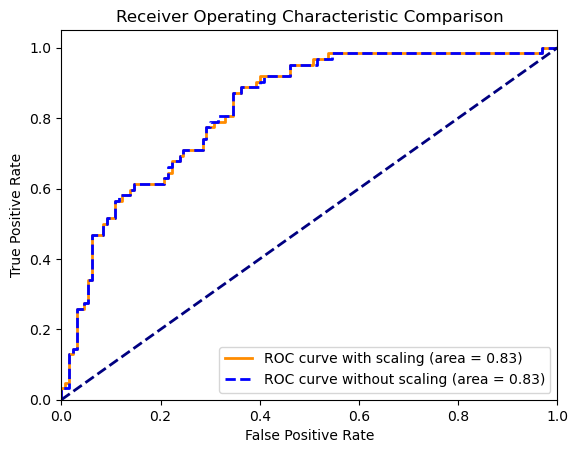

With Scaling:
Train Accuracy: 0.734375
Test Accuracy: 0.734375
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192

Without Scaling:
Train Accuracy: 0.734375
Test Accuracy: 0.734375
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192



In [793]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay


# Auswahl der Features und Zielvariable
X = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Mit Skalierung
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with scaling
model_with_scaling = LogisticRegression(class_weight='balanced', max_iter=1000)
model_with_scaling.fit(X_train_scaled, y_train)

# Make predictions with scaling
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Accuracy with scaling
train_accuracy_with_scaling = model_with_scaling.score(X_train_scaled, y_train)
test_accuracy_with_scaling = model_with_scaling.score(X_test_scaled, y_test)

# Auswertung des Modells mit Skalierung
classification_report_with_scaling = classification_report(y_test, y_pred_with_scaling)

# ROC Curve with scaling
fpr_with_scaling, tpr_with_scaling, _ = roc_curve(y_test, model_with_scaling.predict_proba(X_test_scaled)[:, 1])
roc_auc_with_scaling = roc_auc_score(y_test, model_with_scaling.predict_proba(X_test_scaled)[:, 1])

# Ohne Skalierung

# Initialize and train the logistic regression model without scaling
model_no_scaling = LogisticRegression(class_weight='balanced', max_iter=1000)
model_no_scaling.fit(X_train, y_train)

# Make predictions without scaling
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Accuracy without scaling
train_accuracy_no_scaling = model_no_scaling.score(X_train, y_train)
test_accuracy_no_scaling = model_no_scaling.score(X_test, y_test)

# Auswertung des Modells ohne Skalierung
classification_report_no_scaling = classification_report(y_test, y_pred_no_scaling)

# ROC Curve without scaling
fpr_no_scaling, tpr_no_scaling, _ = roc_curve(y_test, model_no_scaling.predict_proba(X_test)[:, 1])
roc_auc_no_scaling = roc_auc_score(y_test, model_no_scaling.predict_proba(X_test)[:, 1])

# Plot ROC Curve for comparison
plt.figure()
plt.plot(fpr_with_scaling, tpr_with_scaling, color='darkorange', lw=2, label='ROC curve with scaling (area = %0.2f)' % roc_auc_with_scaling)
plt.plot(fpr_no_scaling, tpr_no_scaling, color='blue', lw=2, linestyle='--', label='ROC curve without scaling (area = %0.2f)' % roc_auc_no_scaling)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the results for comparison
print("With Scaling:")
print("Train Accuracy:", train_accuracy_with_scaling)
print("Test Accuracy:", test_accuracy_with_scaling)
print(classification_report_with_scaling)

print("Without Scaling:")
print("Train Accuracy:", train_accuracy_no_scaling)
print("Test Accuracy:", test_accuracy_no_scaling)
print(classification_report_no_scaling)

In [794]:
### Fazit

# Die Ergebnisse zeigen, dass der StandardScaler in diesem Fall keinen Unterschied in der Leistung des Modells macht. 
# Dies kann darauf hinweisen, dass die Merkmale (Glucose, BMI) in diesem speziellen Datensatz bereits auf Skalen liegen, 
# die gut für die logistische Regression geeignet sind, oder dass die logistische Regression robust genug ist,
# mit den unskalierten Daten in diesem Fall gut zu funktionieren.

# Obwohl die Standardisierung oft empfohlen wird, um numerische Probleme zu vermeiden und die Konvergenz zu verbessern, zeigt dieser 
# Vergleich, dass sie nicht immer zu einer Verbesserung der Modellleistung führt. Es ist wichtig, die Ergebnisse immer zu überprüfen 
# und zu validieren, um festzustellen, ob bestimmte Vorverarbeitungsschritte in Ihrem speziellen Fall sinnvoll sind. |oai:code-citation|

# 

# Balance between Diabetes and NoDiabtes

Accuracy: 0.734375

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192



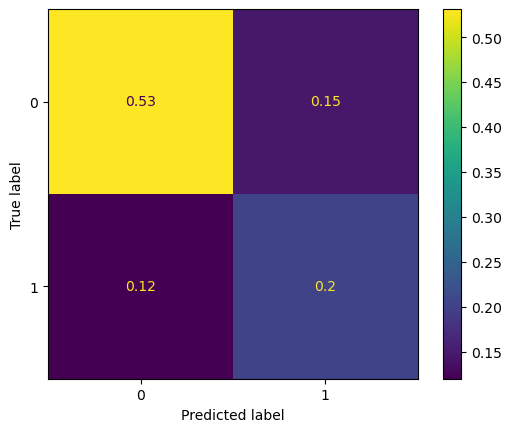

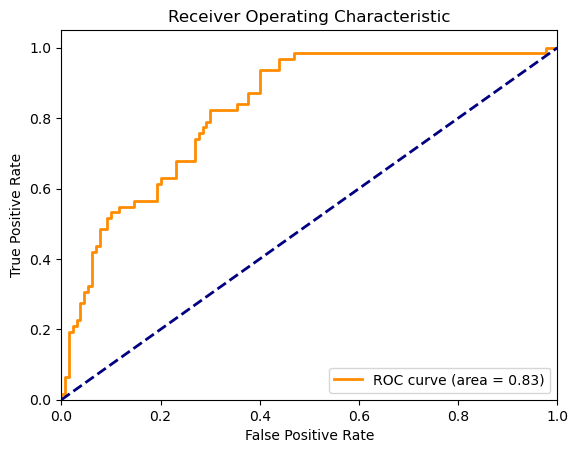

In [797]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Auswahl der Features und Zielvariable
X = diabetes_df[['Glucose', 'BMI', 'Age']]
y = diabetes_df['Outcome']

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Standardisieren der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanciertes Modell erstellen (verwenden Sie class_weight='balanced' für automatisch berechnete Gewichtung)
balance_model = LogisticRegression(class_weight='balanced', max_iter=1000)
balance_model.fit(X_train_scaled, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = balance_model.predict(X_test_scaled)

# Genauigkeit des Test-Datensatzes
print("Accuracy: " + str(balance_model.score(X_test_scaled, y_test)) + "\n")

# Auswertung des Modells
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all', labels=balance_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=balance_model.classes_)
disp.plot()
plt.show()

# ROC Curve
y_pred_prob = balance_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Mit der Balance sind wir der F1 Wert schlechter ROC Wert gleich

# Logistische Regression with GridSearchCV - Seach best C Value

Beste Parameter:  {'C': 10}
Training set score: 0.77
Test set score: 0.80
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



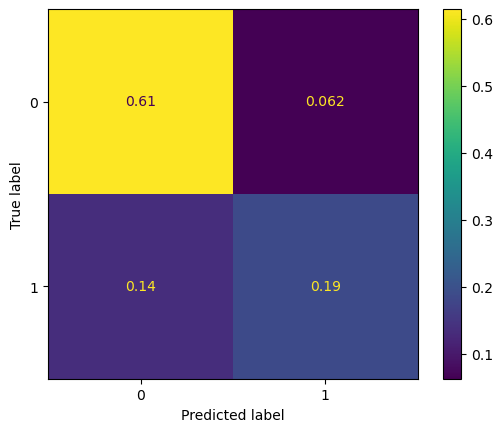

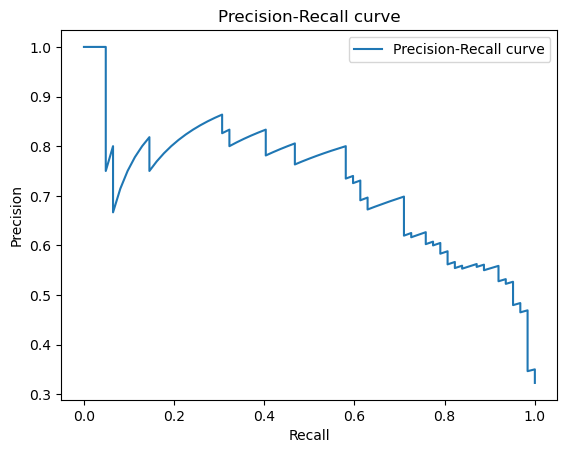

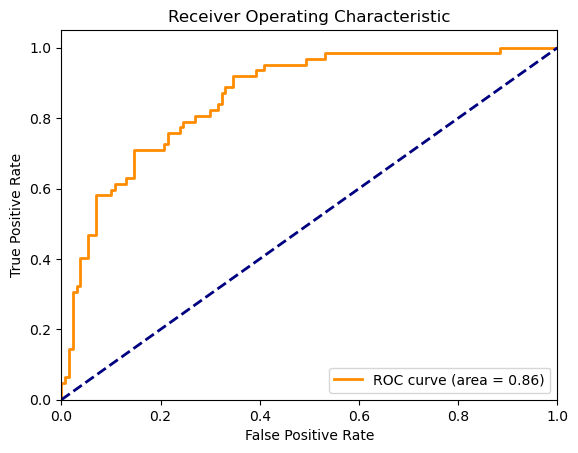

In [800]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

# 2. Feature-Auswahl und Datensplitting
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# 3. Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Logistische Regression mit GridSearchCV
param_grid = {'C': [0.1, 1.0, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# 5. Ergebnisse ausgeben
print("Beste Parameter: ", grid_search.best_params_)
print("Training set score: {:.2f}".format(grid_search.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

# 6. Vorhersagen auf dem Testdatensatz (0 kein Diabetes; 1 Diabetes)
y_pred = grid_search.predict(X_test_scaled)

# 7. Auswertung des Modells mit dem Classification Report
print(classification_report(y_test, y_pred))

# 8. Erstellen und Plotten der Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 9. Precision-Recall Kurve
y_pred_prob = grid_search.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# 10. ROC Kurve und AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Automatic Feature Selection with Univariate Statistics SINN ??

In [802]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report


# Features und Zielvariable trennen
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df ["Outcome"]

# Feature-Auswahl mit univariater Statistak
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)


# Scores für die Features anzeigen
scores = pd.DataFrame (selector.scores_, columns=["Score"], index=X.columns).sort_values (by="Score", ascending=False)
print("Scores der Features:\n", scores)

# Ausgewähite Features anzeigen
selected_features = pd.DataFrame(selector.inverse_transform(X_new), index=X.index, columns=X.columns)
selected_columns = selected_features.columns[selected_features.var() != 0]
print ("\nAusgewähite Features:", selected_columns)


Scores der Features:
                                Score
Glucose                   213.161752
BMI                        71.772072
Age                        46.140611
Pregnancies                39.670227
DiabetesPedigreeFunction   23.871300
Insulin                    13.281108
SkinThickness               4.304381
BloodPressure               3.256950

Ausgewähite Features: Index(['Glucose', 'BMI', 'Age'], dtype='object')


# Iterative Feature Selection without Scaler 

In [804]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Beispiel-Daten
X = diabetes_df.drop(columns=["Outcome"])  # Alle Features außer dem Zielmerkmal
y = diabetes_df["Outcome"]

# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Iterative Merkmalsauswahl (RFE)
logistic_regression = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logistic_regression, n_features_to_select=2)  # Setzen Sie die Anzahl der auszuwählenden Merkmale
rfe.fit(X_train, y_train)

# Transformierte Daten
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Logistische Regression mit ausgewählten Merkmalen
l_regression_iterative = LogisticRegression(max_iter=1000)
l_regression_iterative.fit(X_train_selected, y_train)

# Ausgewählte Merkmale anzeigen
selected_features = rfe.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]

print("Ausgewählte Merkmale:")
print(selected_feature_names)

# Genauigkeit des Test-Datensatzes
print("Accuracy: " + str(l_regression_iterative.score(X_test_selected, y_test)) + "\n")

# Vorhersagen
y_pred = l_regression_iterative.predict(X_test_selected)

# Auswertung des Modells
print(classification_report(y_test, y_pred))

Ausgewählte Merkmale:
['Pregnancies', 'DiabetesPedigreeFunction']
Accuracy: 0.71875

              precision    recall  f1-score   support

           0       0.73      0.92      0.82       130
           1       0.64      0.29      0.40        62

    accuracy                           0.72       192
   macro avg       0.69      0.61      0.61       192
weighted avg       0.70      0.72      0.68       192



# Iterative Feature Selection with Scaler

In [806]:
from sklearn.ensemble import RandomForestClassifier

# Beispiel-Daten
X = diabetes_df.drop(columns=["Outcome"])  # Alle Features außer dem Zielmerkmal
y = diabetes_df["Outcome"]

# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Daten skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature-Auswahl mit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sortieren der Features nach Wichtigkeit


# Auswahl der besten Features (Top 2)
selected_features = indices[:2]
selected_feature_names = [X.columns[i] for i in selected_features]
print("\nAusgewählte Merkmale:")
print(selected_feature_names)

# Daten mit ausgewählten Features transformieren
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

# Logistische Regression mit ausgewählten Merkmalen und Klassen-Gewichtung
l_regression = LogisticRegression(max_iter=1000, class_weight='balanced')
l_regression.fit(X_train_selected, y_train)

# Genauigkeit des Test-Datensatzes
print("\nAccuracy: " + str(l_regression.score(X_test_selected, y_test)) + "\n")

# Vorhersagen
y_pred = l_regression.predict(X_test_selected)

# Auswertung des Modells
print(classification_report(y_test, y_pred))


Ausgewählte Merkmale:
['Glucose', 'BMI']

Accuracy: 0.734375

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192



# K-Fold Cross Validation

In [808]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Prepare the data
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Define the model
model = LogisticRegression(max_iter=1000)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
cv_results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv_results.append(accuracy)

print("K-Fold Cross Validation Accuracy Scores:", cv_results)
print("Mean Accuracy:", np.mean(cv_results))

# Grid Search for Hyperparameter Tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Score:", grid_search.best_score_)

K-Fold Cross Validation Accuracy Scores: [0.7792207792207793, 0.7597402597402597, 0.7727272727272727, 0.7908496732026143, 0.738562091503268]
Mean Accuracy: 0.7682200152788388
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross Validation Score: 0.7708853238265002


# Lasso Regression

In [810]:
from sklearn.linear_model import Lasso
# Merkmale und Zielvariable trennen
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']

# Daten in Trainings- und Testsets aufteilen und skalieren
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression mit verschiedenen Alpha-Werten trainieren und evaluieren
alphas = [1, 0.1, 0.01, 0.001, 0.0001]
train_scores = []
test_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train_scaled, y_train)
    train_scores.append(lasso.score(X_train_scaled, y_train))
    test_scores.append(lasso.score(X_test_scaled, y_test))

    print(f"Alpha: {alpha}")
    print(f"Training set score: {lasso.score(X_train_scaled, y_train):.2f}")
    print(f"Test set score: {lasso.score(X_test_scaled, y_test):.2f}")
    print(f"Number of features used: {np.sum(lasso.coef_ != 0)}\n")

# Grid Search für die besten Alpha-Werte
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(max_iter=100000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_lasso = grid_search.best_estimator_
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Training set score: {:.2f}".format(best_lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(best_lasso.score(X_test_scaled, y_test)))

# Die Scores sind relativ niedrig. Dies könnte darauf hindeuten, dass Lasso-Regression möglicherweise nicht das 
# beste Modell für diese Aufgabe ist. 
# Die Lasso Regression ist eher für viele Merkmale, wovon einige irrelevant sind.

Alpha: 1
Training set score: 0.00
Test set score: -0.01
Number of features used: 0

Alpha: 0.1
Training set score: 0.18
Test set score: 0.20
Number of features used: 2

Alpha: 0.01
Training set score: 0.29
Test set score: 0.32
Number of features used: 6

Alpha: 0.001
Training set score: 0.29
Test set score: 0.32
Number of features used: 8

Alpha: 0.0001
Training set score: 0.29
Test set score: 0.32
Number of features used: 8

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.26
Training set score: 0.29
Test set score: 0.32


# Manuelle Eingabe von Sample und Ergebnis anschauen

In [812]:
# Funktion zur Vorhersage für ein neues Sample
def predict_new_sample(sample):
    sample_df = pd.DataFrame([sample], columns=["BMI", "Glucose", "Age"])
    prediction = l_regression_3.predict(sample_df)
    prediction_proba = l_regression_3.predict_proba(sample_df)
    return prediction[0], prediction_proba[0]

# Neues Sample eingeben
# Beispielwerte für das neue Sample: BMI, Glucose, Age
new_sample = [33.6, 148, 50]  # Diese Werte kannst du durch eigene Eingaben ersetzen

# Vorhersage für das neue Sample
prediction, prediction_proba = predict_new_sample(new_sample)
print(f'Vorhersage: {"Diabetes" if prediction == 1 else "Kein Diabetes"}')
print(f'Wahrscheinlichkeit für Diabetes: {prediction_proba[1] * 100:.2f}%')
print(f'Wahrscheinlichkeit für Kein Diabetes: {prediction_proba[0] * 100:.2f}%')

Vorhersage: Diabetes
Wahrscheinlichkeit für Diabetes: 66.45%
Wahrscheinlichkeit für Kein Diabetes: 33.55%
